In [46]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

In [47]:
customer_data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In this segment, I prepared the data for clustering. I grouped the transaction data by CustomerID and aggregated the TotalValue and Quantity for each customer. These two features will be used to cluster the customers based on their purchase behavior. The .reset_index() is used to return a DataFrame with a clean index.

In [48]:
kmeans = KMeans(n_clusters=8)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['TotalValue', 'Quantity']])

 I have applied the KMeans clustering algorithm to the scaled data. The fit_predict() method performs the clustering and assigns cluster labels to the customer_data DataFrame in the new Cluster column.

In [49]:
db_index = davies_bouldin_score(customer_data[['TotalValue', 'Quantity']], customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.43834319305937364


I calculated the Davies-Bouldin Index (DB Index) to evaluate the quality of the clusters. The DB Index measures how well-separated the clusters are and how compact they are. A lower value indicates better clustering, meaning the clusters are well-separated and internally cohesive.

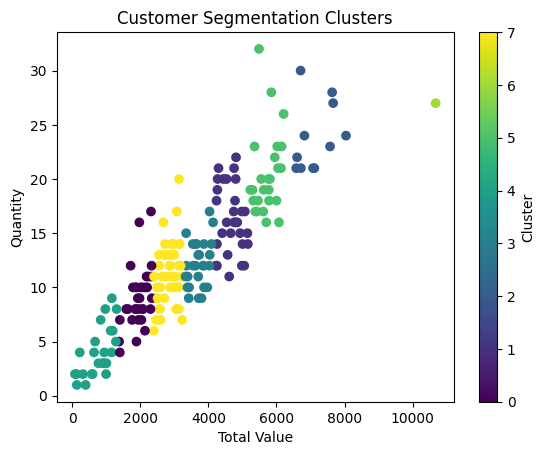

In [50]:

plt.scatter(customer_data['TotalValue'], customer_data['Quantity'], c=customer_data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.colorbar(label='Cluster')
plt.show()

In this final segment, I visualized the clustering results using a scatter plot. Each point represents a customer, and the points are colored based on their assigned cluster. This allows for a visual understanding of how the customers are grouped according to their transaction behaviors. I used the viridis color map for better clarity and added a color bar for reference.